# 1-Loading Pickle Files

In [1]:
import pandas as pd
import os

#List of all pickle files
pklfiles = [f for f in os.listdir('processed') if os.path.isfile(os.path.join('processed', f)) and f.endswith('.pkl')]
print(pklfiles)

['ad-chega.pkl', 'ad-ps.pkl']


In [2]:
video = 'ad-chega'
data = pd.read_pickle(os.path.join('processed', video + '.pkl'))

#Print first lines
data.head() 

,filename,detections,poses,faces,text,embedding,fer
0,img00116.jpeg,"[[0, 53, 620, 659, person, 0.93359375], [612, ...","[[[0.6981924772262573, 0.41902482509613037, -0...","[[[0.6962661743164062, 0.477009117603302, -0.0...","[3, {2624, MONTYISGRO, O1:02, OO:OO, vÊNPBRA]","[1, 2, 1, 0, 254, 253, 254, 255, 4, 12, 253, 1...","[{'location': [773, 1055, 129, 412], 'embeddin..."
1,img01657.jpeg,"[[87, 45, 740, 587, person, 0.94140625], [1069...","[[[0.4402078092098236, 0.4400981664657593, -0....","[[[0.4418838918209076, 0.499070942401886, -0.0...","[=3, 9, [2624, MONHYIEGRO, 13.20, 13.05, vÊNPB...","[0, 253, 253, 253, 254, 253, 1, 255, 0, 18, 25...","[{'location': [344, 655, 133, 445], 'embedding..."
2,img00589.jpeg,"[[625, 31, 646, 686, person, 0.9375], [7, 38, ...","[[[0.28483036160469055, 0.3542748689651489, -0...","[[[0.6996282339096069, 0.436468243598938, -0.0...","[3, 82624, MONHYIEGRO, 03.48, 03.58, vÊNPBIA, 9]","[253, 1, 0, 255, 254, 253, 255, 255, 4, 7, 254...","[{'location': [166, 459, 91, 384], 'embedding'..."
3,img00264.jpeg,"[[604, 101, 111, 133, person, 0.80078125], [15...","[[[0.7193284034729004, 0.27134227752685547, -0...",[],"[23, 9, MONHYÍEGRO, 02.56, OO:OO, vÊNPBRA]","[253, 254, 4, 254, 2, 253, 1, 253, 1, 2, 0, 1,...","[{'location': [1120, 1188, 507, 576], 'embeddi..."
4,img00070.jpeg,"[[91, 29, 767, 660, person, 0.9375], [1051, 48...","[[[0.480089008808136, 0.362809419631958, -0.58...","[[[0.47768157720565796, 0.4398738145828247, -0...","[=3, 9, {2624, MONTYIEGRO, 00:16, OO:OO, vÊNPB...","[0, 0, 0, 0, 254, 253, 1, 255, 5, 18, 0, 9, 3,...","[{'location': [404, 688, 105, 389], 'embedding..."


In [16]:
data.iloc[0]

filename                                          img00116.jpeg
detections    [[0, 53, 620, 659, person, 0.93359375], [612, ...
poses         [[[0.6981924772262573, 0.41902482509613037, -0...
faces         [[[0.6962661743164062, 0.477009117603302, -0.0...
text              [3, {2624, MONTYISGRO, O1:02, OO:OO, vÊNPBRA]
embedding     [1, 2, 1, 0, 254, 253, 254, 255, 4, 12, 253, 1...
fer           [{'location': [773, 1055, 129, 412], 'embeddin...
Name: 0, dtype: object

# 2-Extracting the embedded vectors of every frame 

In [3]:
import numpy as np


embeddings_list = []


for index, row in data.iterrows():
    
    embedding = row['embedding']
    embeddings_list.append(embedding)

#Convert the list of embeddings to a numpy array
embeddings_array = np.array(embeddings_list)


print(embeddings_array)

[[  1   2   1 ...   8   0   0]
 [  0 253 253 ...   6 255   3]
 [253   1   0 ...   2 255   5]
 ...
 [254 254   5 ... 254 254 254]
 [253   3   1 ... 255 254   1]
 [  0 254   0 ...   5 255   2]]


# 3-Usage of Hirarchical Clustering on the embedded vectors previously mentioned

In [4]:
from sklearn.cluster import AgglomerativeClustering
#Ad-chega - 5 , ad-ps - 8
#Number of clusters:
num_clusters = 5
hierarchical_clusterer = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = hierarchical_clusterer.fit_predict(embeddings_array)

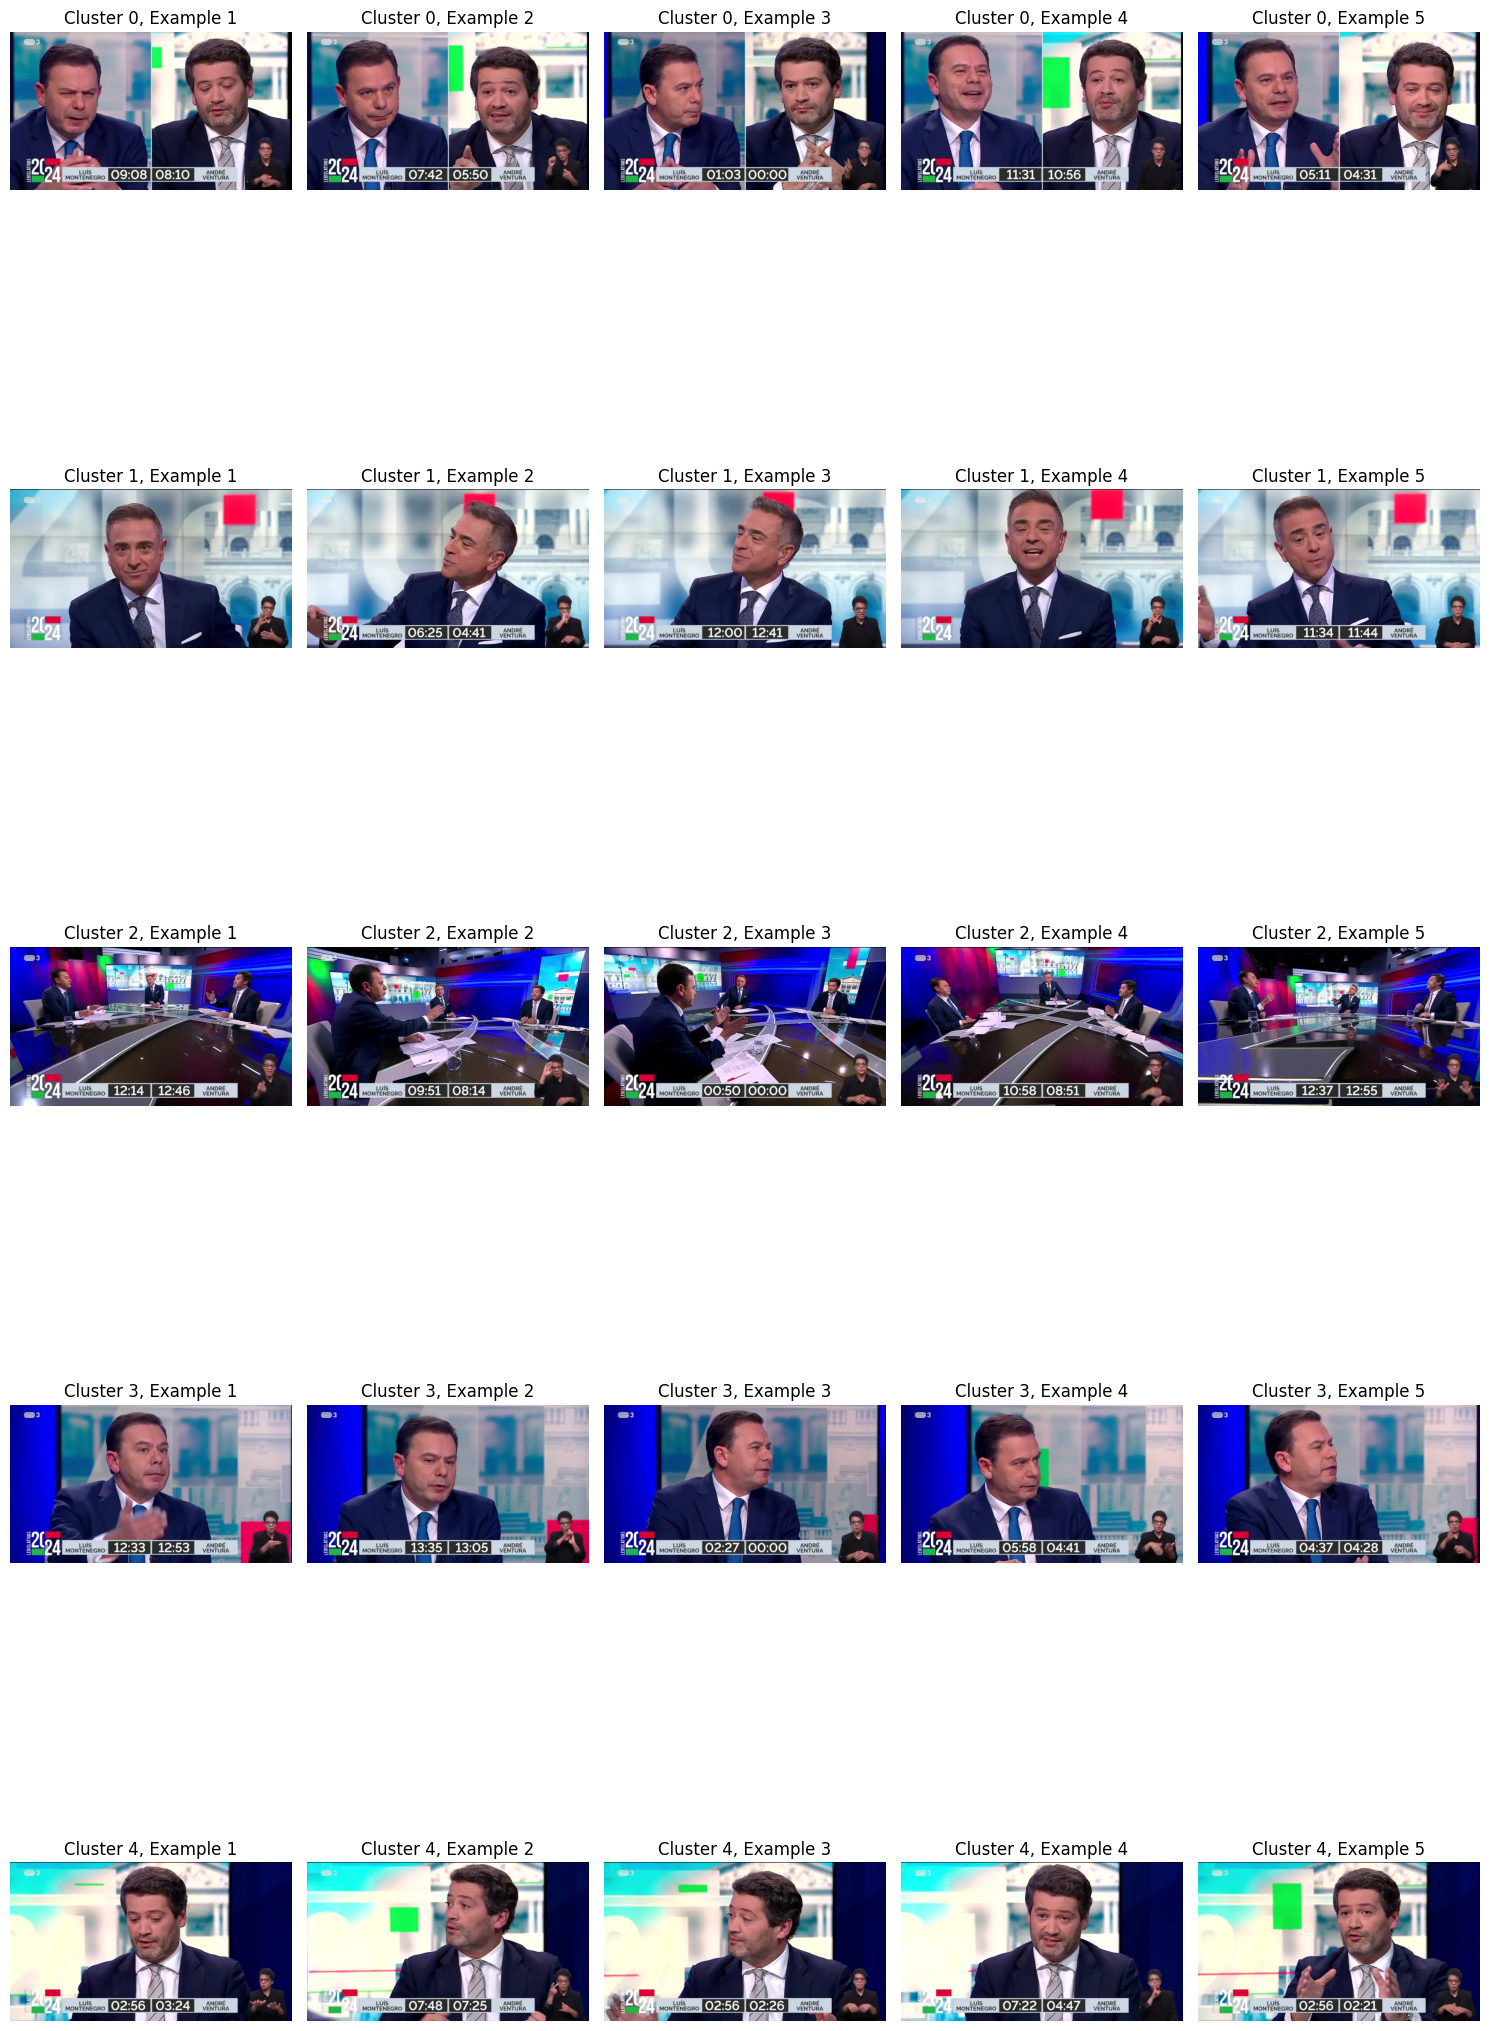

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random

#Images per cluster
num_images_per_cluster = 5

#Get unique cluster labels
unique_clusters = np.unique(cluster_labels)

plt.figure(figsize=(15, 5 * len(unique_clusters)))

#Iterate over each cluster
for i, cluster in enumerate(unique_clusters):

    indices = np.where(cluster_labels == cluster)[0]
    
    #Select 5 random indices from the current cluster
    random_indices = np.random.choice(indices, min(num_images_per_cluster, len(indices)), replace=False)
    
    #Plot the selected images
    for j, index in enumerate(random_indices):
        
        filename = data.iloc[index]['filename']
        
        
        image = plt.imread(os.path.join(r'D:\Desktop\IST\Ano 1\P4\PBDat\videos\ad-chega', filename))
        
        plt.subplot(len(unique_clusters), num_images_per_cluster, i * num_images_per_cluster + j + 1)
        plt.imshow(image)
        plt.title(f'Cluster {cluster}, Example {j+1}')
        plt.axis('off')

plt.tight_layout()
plt.show()

# 4-Reduce Data dimensionality for visualization

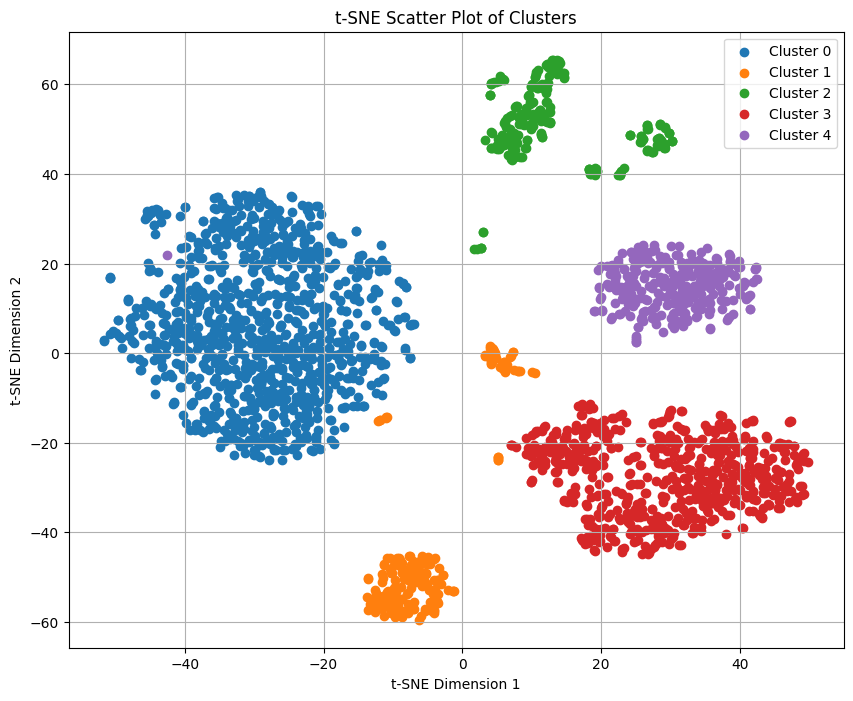

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

#Perform t-SNE to reduce the dimensionality to 2 for visualization
tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings_array)

#Scatter plot of the t-SNE-transformed data with cluster labels
plt.figure(figsize=(10, 8))
for cluster in np.unique(cluster_labels):
    plt.scatter(embeddings_tsne[cluster_labels == cluster, 0], embeddings_tsne[cluster_labels == cluster, 1], label=f'Cluster {cluster}')
plt.title('t-SNE Scatter Plot of Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.grid(True)
plt.show()